In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

In [2]:
#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [3]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 3s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [5]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0

2022-02-07 13:22:38.947373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 13:22:39.050827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 13:22:39.051501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 13:22:39.052590: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

2022-02-07 13:22:42.943268: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


2022-02-07 13:22:44.251940: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


313/313 [==============================] - 9s 7ms/step - loss: 1.7457 - accuracy: 0.3832 - val_loss: 1.4005 - val_accuracy: 0.5149
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.3935 - accuracy: 0.5070 - val_loss: 1.3283 - val_accuracy: 0.5274
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.3099 - accuracy: 0.5339

Test score: 1.3099465370178223
Test accuracy: 0.5339000225067139


In [8]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


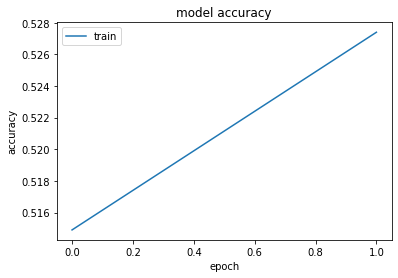

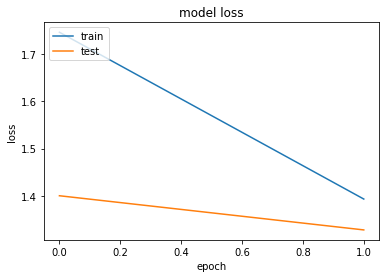

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Checking accuracy for different batch sizes**

In [10]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
#constant
BATCH_SIZE = 32
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_4 (Activation)    (None, 512)              

In [12]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5561 - accuracy: 0.4443 - val_loss: 1.2842 - val_accuracy: 0.5662
Epoch 2/2
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2943 - accuracy: 0.5509 - val_loss: 1.1938 - val_accuracy: 0.5928
Testing...
313/313 [==============================] - 1s 2ms/step - loss: 1.1823 - accuracy: 0.5879

Test score: 1.1822808980941772
Test accuracy: 0.5878999829292297


In [13]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


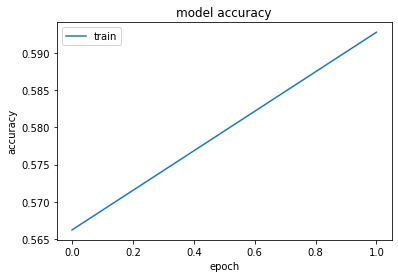

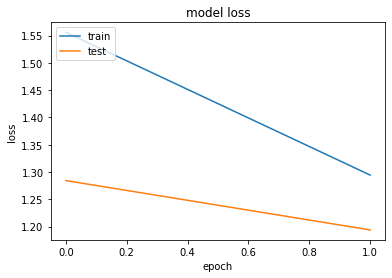

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [16]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_7 (Activation)    (None, 512)              

In [17]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
625/625 [==============================] - 4s 5ms/step - loss: 1.6291 - accuracy: 0.4167 - val_loss: 1.3879 - val_accuracy: 0.5037
Epoch 2/2
625/625 [==============================] - 3s 5ms/step - loss: 1.3186 - accuracy: 0.5368 - val_loss: 1.2571 - val_accuracy: 0.5616
Testing...
157/157 [==============================] - 0s 3ms/step - loss: 1.2422 - accuracy: 0.5584

Test score: 1.2422397136688232
Test accuracy: 0.5583999752998352


In [18]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


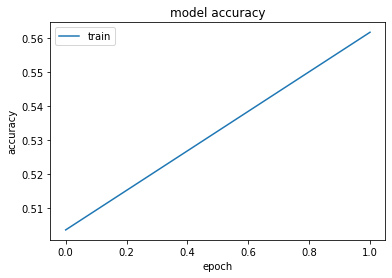

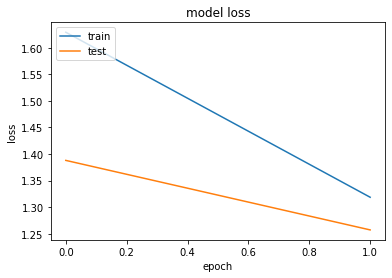

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [21]:
#constant
BATCH_SIZE = 256
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_10 (Activation)   (None, 512)              

In [22]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
157/157 [==============================] - 2s 10ms/step - loss: 1.8562 - accuracy: 0.3528 - val_loss: 1.8301 - val_accuracy: 0.3755
Epoch 2/2
157/157 [==============================] - 1s 7ms/step - loss: 1.4701 - accuracy: 0.4804 - val_loss: 1.3369 - val_accuracy: 0.5259
Testing...
40/40 [==============================] - 0s 4ms/step - loss: 1.3210 - accuracy: 0.5254

Test score: 1.3210166692733765
Test accuracy: 0.5253999829292297


In [23]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


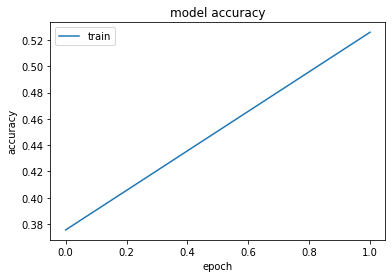

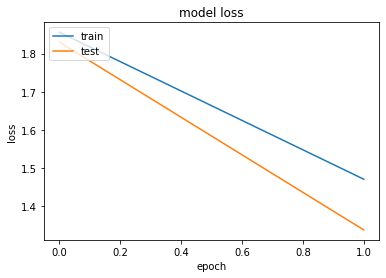

In [24]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* >**Batch size = 32  Accuracy = 58.31%**
* >**Batch size = 64  Accuracy = 59.28%**
* >**Batch size = 128 Accuracy = 51.42%**
* >**Batch size = 256 Accuracy = 46.22%**

**Checking accuracy for different epoch sizes**

In [25]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [26]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 10
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_13 (Activation)   (None, 512)              

In [27]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/10
313/313 [==============================] - 3s 7ms/step - loss: 1.7278 - accuracy: 0.3914 - val_loss: 1.4081 - val_accuracy: 0.5003
Epoch 2/10
313/313 [==============================] - 2s 6ms/step - loss: 1.3602 - accuracy: 0.5210 - val_loss: 1.2446 - val_accuracy: 0.5652
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 1.2261 - accuracy: 0.5663 - val_loss: 1.1753 - val_accuracy: 0.5961
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 1.1284 - accuracy: 0.6027 - val_loss: 1.1093 - val_accuracy: 0.6219
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 1.0628 - accuracy: 0.6271 - val_loss: 1.1621 - val_accuracy: 0.5984
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 1.0011 - accuracy: 0.6482 - val_loss: 1.0383 - val_accuracy: 0.6389
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 0.9445 - accuracy: 0.6697 - val_loss: 1.0746 - val_accuracy: 0.6320
Epoch 

In [28]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


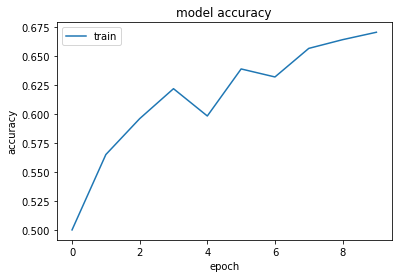

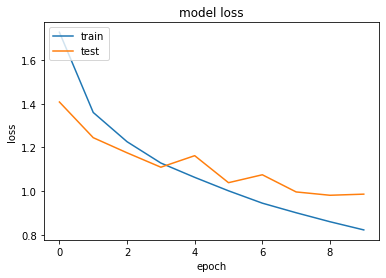

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [31]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_16 (Activation)   (None, 512)              

In [32]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 1.7770 - accuracy: 0.3773 - val_loss: 1.4352 - val_accuracy: 0.4767
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3977 - accuracy: 0.5057 - val_loss: 1.2713 - val_accuracy: 0.5535
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2661 - accuracy: 0.5522 - val_loss: 1.2169 - val_accuracy: 0.5724
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1824 - accuracy: 0.5810 - val_loss: 1.2351 - val_accuracy: 0.5747
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1125 - accuracy: 0.6065 - val_loss: 1.1033 - val_accuracy: 0.6173
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0533 - accuracy: 0.6320 - val_loss: 1.0578 - val_accuracy: 0.6318
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0010 - accuracy: 0.6488 - val_loss: 1.0685 - val_accuracy: 0.6328
Epoch 

In [33]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


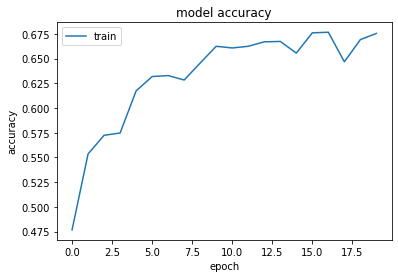

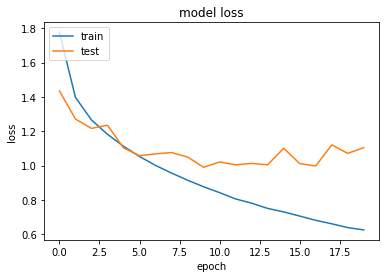

In [34]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [36]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 30
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_19 (Activation)   (None, 512)              

In [37]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 1.7904 - accuracy: 0.3709 - val_loss: 1.4184 - val_accuracy: 0.5010
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 1.3938 - accuracy: 0.5056 - val_loss: 1.2862 - val_accuracy: 0.5443
Epoch 3/30
313/313 [==============================] - 2s 5ms/step - loss: 1.2665 - accuracy: 0.5545 - val_loss: 1.1933 - val_accuracy: 0.5894
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.1819 - accuracy: 0.5817 - val_loss: 1.1399 - val_accuracy: 0.6013
Epoch 5/30
313/313 [==============================] - 2s 6ms/step - loss: 1.1159 - accuracy: 0.6078 - val_loss: 1.1263 - val_accuracy: 0.6092
Epoch 6/30
313/313 [==============================] - 2s 5ms/step - loss: 1.0559 - accuracy: 0.6271 - val_loss: 1.0678 - val_accuracy: 0.6297
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.0061 - accuracy: 0.6457 - val_loss: 1.0771 - val_accuracy: 0.6312
Epoch 

In [38]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


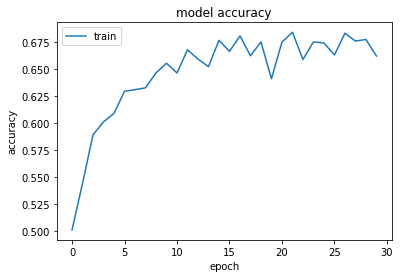

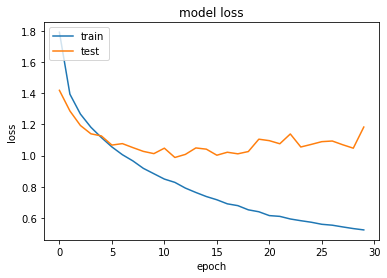

In [39]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [41]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_22 (Activation)   (None, 512)              

In [42]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/40
313/313 [==============================] - 3s 7ms/step - loss: 1.7197 - accuracy: 0.3935 - val_loss: 1.4111 - val_accuracy: 0.4959
Epoch 2/40
313/313 [==============================] - 2s 5ms/step - loss: 1.3482 - accuracy: 0.5239 - val_loss: 1.2273 - val_accuracy: 0.5763
Epoch 3/40
313/313 [==============================] - 2s 5ms/step - loss: 1.2218 - accuracy: 0.5701 - val_loss: 1.1797 - val_accuracy: 0.5844
Epoch 4/40
313/313 [==============================] - 2s 5ms/step - loss: 1.1322 - accuracy: 0.6000 - val_loss: 1.0910 - val_accuracy: 0.6206
Epoch 5/40
313/313 [==============================] - 2s 6ms/step - loss: 1.0637 - accuracy: 0.6271 - val_loss: 1.2627 - val_accuracy: 0.5701
Epoch 6/40
313/313 [==============================] - 2s 6ms/step - loss: 1.0039 - accuracy: 0.6492 - val_loss: 1.0374 - val_accuracy: 0.6437
Epoch 7/40
313/313 [==============================] - 2s 5ms/step - loss: 0.9518 - accuracy: 0.6665 - val_loss: 1.0663 - val_accuracy: 0.6253
Epoch 

In [43]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


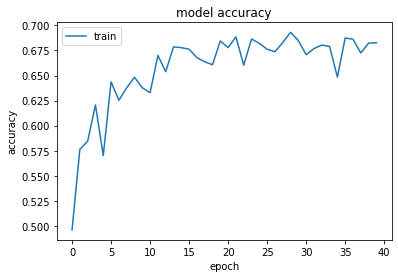

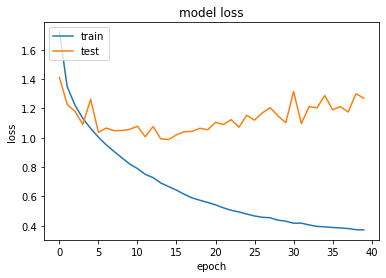

In [44]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [46]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 50
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_25 (Activation)   (None, 512)              

In [47]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
313/313 [==============================] - 3s 7ms/step - loss: 1.6752 - accuracy: 0.4020 - val_loss: 1.3978 - val_accuracy: 0.5001
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 1.3367 - accuracy: 0.5283 - val_loss: 1.2526 - val_accuracy: 0.5588
Epoch 3/50
313/313 [==============================] - 2s 5ms/step - loss: 1.2061 - accuracy: 0.5756 - val_loss: 1.1920 - val_accuracy: 0.5767
Epoch 4/50
313/313 [==============================] - 2s 5ms/step - loss: 1.1106 - accuracy: 0.6118 - val_loss: 1.1463 - val_accuracy: 0.6007
Epoch 5/50
313/313 [==============================] - 2s 5ms/step - loss: 1.0383 - accuracy: 0.6388 - val_loss: 1.1225 - val_accuracy: 0.6074
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.9766 - accuracy: 0.6590 - val_loss: 1.0263 - val_accuracy: 0.6426
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.9203 - accuracy: 0.6796 - val_loss: 1.0032 - val_accuracy: 0.6566
Epoch 

In [48]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


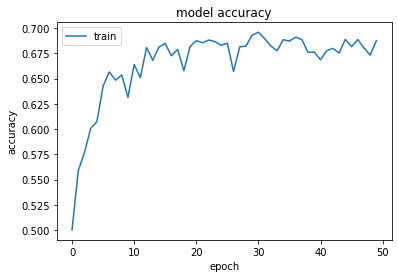

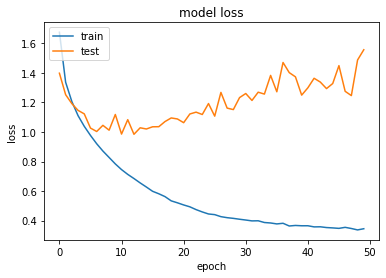

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* >**Epochs = 2  Test Accuracy = 51.42%**
* >**Epochs = 10 Test Accuracy = 66.26%**
* >**Epochs = 20 Test Accuracy = 67.65%** 
* >**Epochs = 30 Test Accuracy = 66.94%**
* >**Epochs = 40 Test Accuracy = 68.01%**
* >**Epochs = 50 Test Accuracy = %**

**Testing accuracies for different validation splits**

In [50]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [51]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.1
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_28 (Activation)   (None, 512)              

In [52]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
352/352 [==============================] - 3s 6ms/step - loss: 1.7440 - accuracy: 0.3848 - val_loss: 1.3881 - val_accuracy: 0.5206
Epoch 2/2
352/352 [==============================] - 2s 5ms/step - loss: 1.3758 - accuracy: 0.5106 - val_loss: 1.3239 - val_accuracy: 0.5276
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.3171 - accuracy: 0.5284

Test score: 1.3171230554580688
Test accuracy: 0.5284000039100647


In [53]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


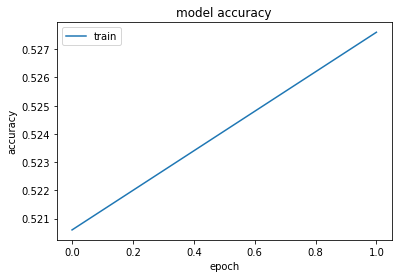

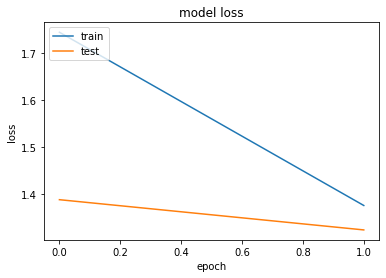

In [54]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [56]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_31 (Activation)   (None, 512)             

In [57]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
274/274 [==============================] - 3s 8ms/step - loss: 1.7835 - accuracy: 0.3722 - val_loss: 1.4608 - val_accuracy: 0.4827
Epoch 2/2
274/274 [==============================] - 2s 6ms/step - loss: 1.4013 - accuracy: 0.5041 - val_loss: 1.2801 - val_accuracy: 0.5482
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2559 - accuracy: 0.5521

Test score: 1.2559038400650024
Test accuracy: 0.5521000027656555


In [58]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


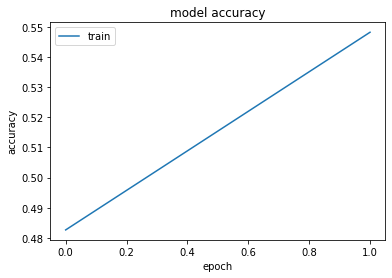

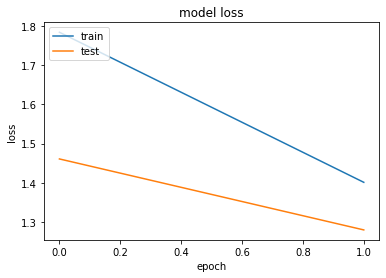

In [59]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [61]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.4
OPTIM = RMSprop()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_34 (Activation)   (None, 512)             

In [62]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
235/235 [==============================] - 3s 10ms/step - loss: 1.9015 - accuracy: 0.3379 - val_loss: 1.5621 - val_accuracy: 0.4425
Epoch 2/2
235/235 [==============================] - 2s 7ms/step - loss: 1.4641 - accuracy: 0.4761 - val_loss: 1.3868 - val_accuracy: 0.4879
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.3682 - accuracy: 0.4904

Test score: 1.368247628211975
Test accuracy: 0.4903999865055084


In [63]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


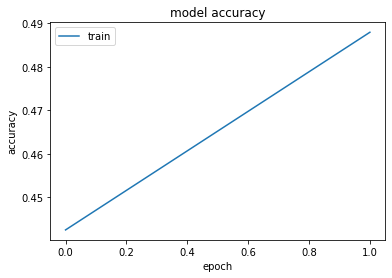

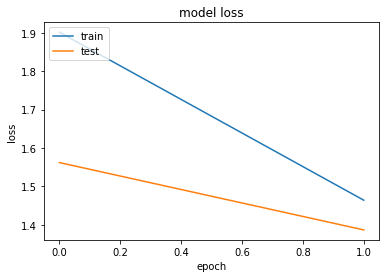

In [64]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = RMSprop() Dropout=0.25,0.5**

* > **Validation_split = 0.1 Test Accuracy = 54.07%**
* > **Validation_split = 0.2 Test Accuracy = 51.42%**
* > **Validation_split = 0.3 Test Accuracy = 54.69%**
* > **Validation_split = 0.4 Test Accuracy = 50.11%**

**Checking accuracies of different OPTIMs**

In [65]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [66]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = SGD()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_37 (Activation)   (None, 512)             

In [67]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 2.1839 - accuracy: 0.1953 - val_loss: 2.0353 - val_accuracy: 0.2713
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.9872 - accuracy: 0.2853 - val_loss: 1.8944 - val_accuracy: 0.3394
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.8822 - accuracy: 0.3441

Test score: 1.8822232484817505
Test accuracy: 0.3440999984741211


In [68]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


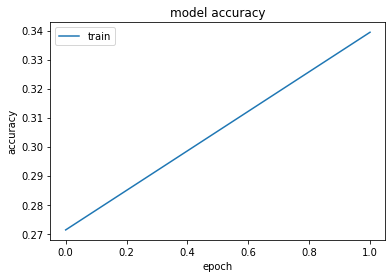

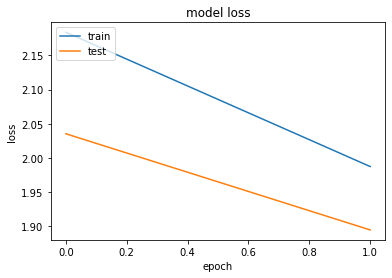

In [69]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [71]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_40 (Activation)   (None, 512)             

In [72]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 7ms/step - loss: 1.7470 - accuracy: 0.3726 - val_loss: 1.4081 - val_accuracy: 0.5174
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.3925 - accuracy: 0.5033 - val_loss: 1.2435 - val_accuracy: 0.5690
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2344 - accuracy: 0.5625

Test score: 1.2343871593475342
Test accuracy: 0.5625


In [73]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


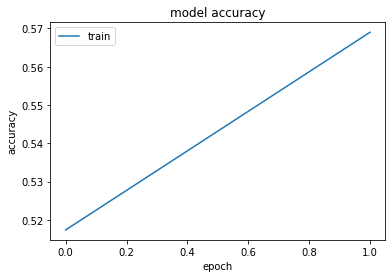

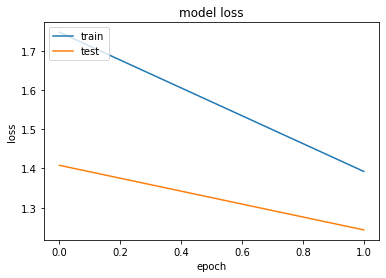

In [74]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 Dropout=0.25,0.5**

* >**RMSprop() Test accuracy = 51.42%**
* >**Adam()    Test accuracy = 56.15%**
* >**SGD()     Test accuracy = 33.73%**

**Checking accuracies for different Dropout values**

In [75]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [76]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_43 (Activation)   (None, 512)             

In [77]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 7ms/step - loss: 1.5834 - accuracy: 0.4371 - val_loss: 1.3227 - val_accuracy: 0.5374
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.2310 - accuracy: 0.5616 - val_loss: 1.1799 - val_accuracy: 0.5835
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.1733 - accuracy: 0.5832

Test score: 1.1732802391052246
Test accuracy: 0.5831999778747559


In [78]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


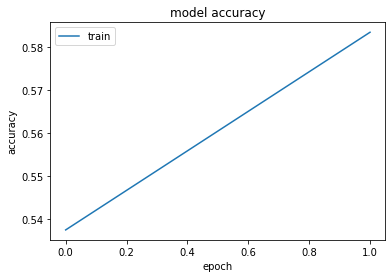

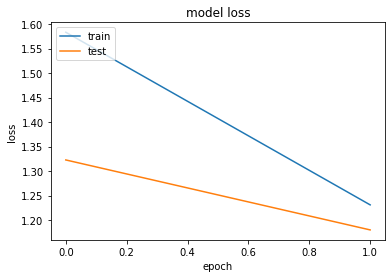

In [79]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [81]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_46 (Activation)   (None, 512)             

In [82]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 1.6360 - accuracy: 0.4152 - val_loss: 1.3588 - val_accuracy: 0.5312
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.2964 - accuracy: 0.5369 - val_loss: 1.2267 - val_accuracy: 0.5736
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2226 - accuracy: 0.5670

Test score: 1.2226053476333618
Test accuracy: 0.5669999718666077


In [83]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


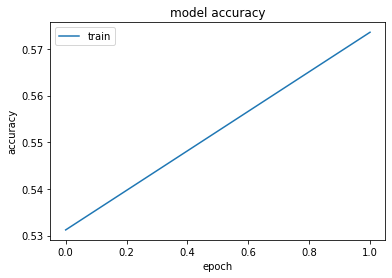

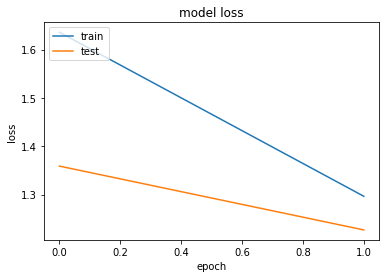

In [84]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [86]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_49 (Activation)   (None, 512)             

In [87]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 7ms/step - loss: 1.5670 - accuracy: 0.4418 - val_loss: 1.2950 - val_accuracy: 0.5442
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.2517 - accuracy: 0.5579 - val_loss: 1.2089 - val_accuracy: 0.5814
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2001 - accuracy: 0.5780

Test score: 1.2001346349716187
Test accuracy: 0.578000009059906


In [88]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


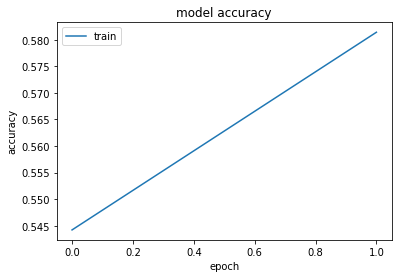

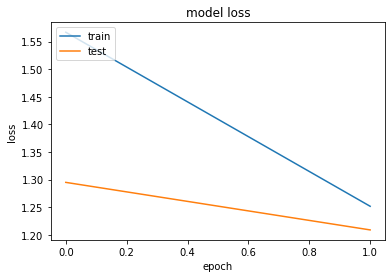

In [89]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [91]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_52 (Activation)   (None, 512)             

In [92]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 1.6101 - accuracy: 0.4221 - val_loss: 1.3874 - val_accuracy: 0.5057
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.3049 - accuracy: 0.5368 - val_loss: 1.1970 - val_accuracy: 0.5847
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.1845 - accuracy: 0.5796

Test score: 1.1845407485961914
Test accuracy: 0.5795999765396118


In [93]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


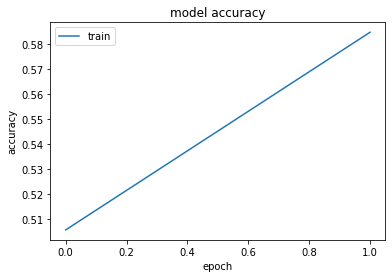

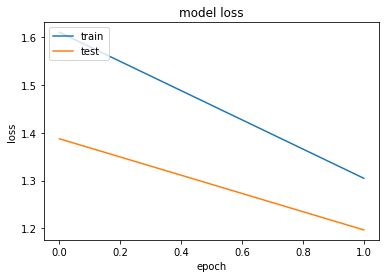

In [94]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [96]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_54 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_55 (Activation)   (None, 512)             

In [97]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 3s 7ms/step - loss: 1.7726 - accuracy: 0.3595 - val_loss: 1.4711 - val_accuracy: 0.4803
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 1.4536 - accuracy: 0.4770 - val_loss: 1.2944 - val_accuracy: 0.5434
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2809 - accuracy: 0.5436

Test score: 1.2808514833450317
Test accuracy: 0.5436000227928162


In [98]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


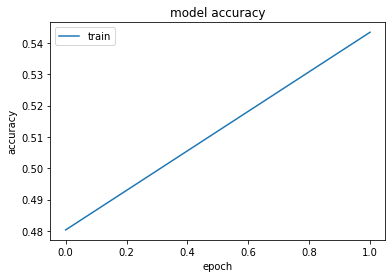

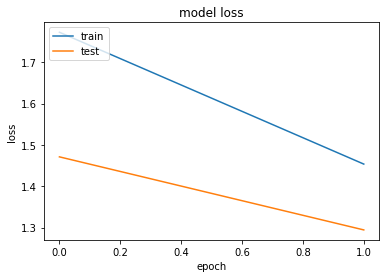

In [99]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [101]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_57 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_58 (Activation)   (None, 512)             

In [102]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 1.7187 - accuracy: 0.3762 - val_loss: 1.4203 - val_accuracy: 0.4946
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.4133 - accuracy: 0.4920 - val_loss: 1.2760 - val_accuracy: 0.5624
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.2720 - accuracy: 0.5575

Test score: 1.2720472812652588
Test accuracy: 0.5575000047683716


In [103]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


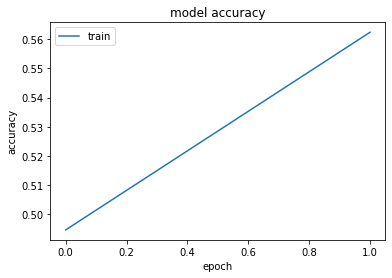

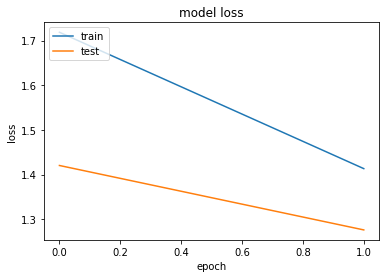

In [104]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [106]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_60 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_61 (Activation)   (None, 512)             

In [107]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 1.8004 - accuracy: 0.3428 - val_loss: 1.4818 - val_accuracy: 0.4701
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.5173 - accuracy: 0.4544 - val_loss: 1.3143 - val_accuracy: 0.5500
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.3052 - accuracy: 0.5457

Test score: 1.3052263259887695
Test accuracy: 0.5457000136375427


In [108]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


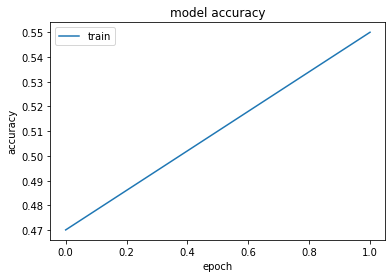

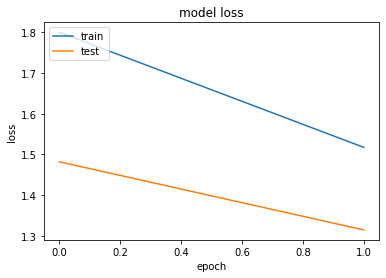

In [109]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [111]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_63 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_64 (Activation)   (None, 512)             

In [112]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 2s 6ms/step - loss: 1.8933 - accuracy: 0.3090 - val_loss: 1.5510 - val_accuracy: 0.4637
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 1.6182 - accuracy: 0.4188 - val_loss: 1.3993 - val_accuracy: 0.5188
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.3829 - accuracy: 0.5240

Test score: 1.3829193115234375
Test accuracy: 0.5239999890327454


In [113]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


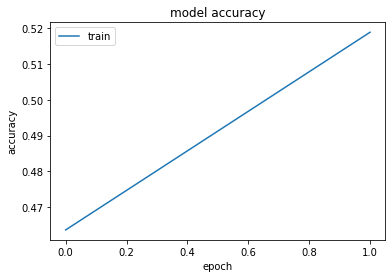

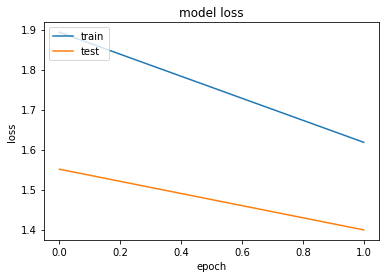

In [114]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [115]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [116]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 2
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.9))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_67 (Activation)   (None, 512)             

In [117]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/2
313/313 [==============================] - 3s 6ms/step - loss: 2.2182 - accuracy: 0.1786 - val_loss: 1.8994 - val_accuracy: 0.3359
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.9553 - accuracy: 0.2742 - val_loss: 1.7398 - val_accuracy: 0.4108
Testing...
79/79 [==============================] - 0s 3ms/step - loss: 1.7226 - accuracy: 0.4173

Test score: 1.7226382493972778
Test accuracy: 0.4172999858856201


In [118]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


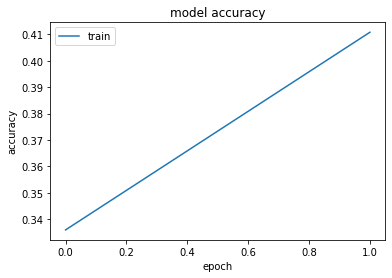

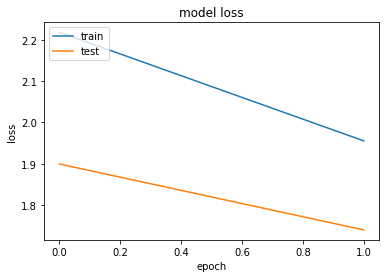

In [119]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BATCH_SIZE=128 NB_EPOCH = 2 VALIDATION_SPLIT = 0.2 OPTIM = Adam() Dropout=0.25,0.5**

* >**Dropout=0.1 Accuracy=**
* >**Dropout=0.2 Accuracy=**
* >**Dropout=0.25,0.5 Accuracy=**
* >**Dropout=0.3 Accuracy=**
* >**Dropout=0.4 Accuracy=**
* >**Dropout=0.5 Accuracy=**
* >**Dropout=0.6 Accuracy=**
* >**Dropout=0.7 Accuracy=**
* >**Dropout=0.8 Accuracy=**
* >**Dropout=0.9 Accuracy=**

In [120]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [121]:
#constant
BATCH_SIZE = 64
NB_EPOCH = 50
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.3
OPTIM = Adam()

# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_70 (Activation)   (None, 512)             

In [122]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,  metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,  epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,   verbose=VERBOSE)
print('Testing...')
score = model.evaluate(X_test, Y_test,batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/50
547/547 [==============================] - 3s 5ms/step - loss: 1.5356 - accuracy: 0.4517 - val_loss: 1.3787 - val_accuracy: 0.4961
Epoch 2/50
547/547 [==============================] - 2s 4ms/step - loss: 1.2194 - accuracy: 0.5671 - val_loss: 1.1949 - val_accuracy: 0.5846
Epoch 3/50
547/547 [==============================] - 3s 5ms/step - loss: 1.0823 - accuracy: 0.6153 - val_loss: 1.1611 - val_accuracy: 0.5967
Epoch 4/50
547/547 [==============================] - 2s 4ms/step - loss: 0.9702 - accuracy: 0.6567 - val_loss: 1.0669 - val_accuracy: 0.6276
Epoch 5/50
547/547 [==============================] - 2s 4ms/step - loss: 0.8682 - accuracy: 0.6942 - val_loss: 1.0288 - val_accuracy: 0.6423
Epoch 6/50
547/547 [==============================] - 3s 5ms/step - loss: 0.7805 - accuracy: 0.7266 - val_loss: 1.0085 - val_accuracy: 0.6507
Epoch 7/50
547/547 [==============================] - 2s 4ms/step - loss: 0.6868 - accuracy: 0.7582 - val_loss: 1.0410 - val_accuracy: 0.6485
Epoch 

In [123]:
#server.launch(model)
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


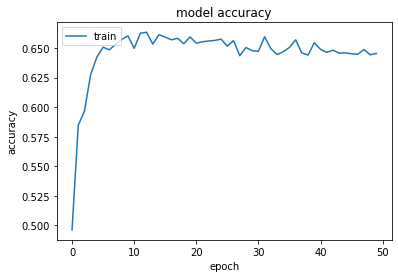

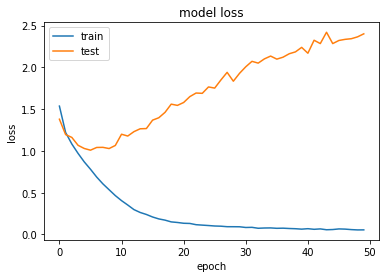

In [124]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()